Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.6713 - accuracy: 0.7558 - val_loss: 0.3959 - val_accuracy: 0.8514
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4040 - accuracy: 0.8563 - val_loss: 0.3294 - val_accuracy: 0.8756
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3377 - accuracy: 0.8789 - val_loss: 0.2953 - val_accuracy: 0.8904
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3025 - accuracy: 0.8913 - val_loss: 0.2897 - val_accuracy: 0.8960
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 0.2586 - val_accuracy: 0.9073
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2536 - accuracy: 0.9081 - val_loss: 0.2492 - val_accuracy: 0.9092
Epoch 7/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2343 - accuracy: 0.9148 - val_loss: 0.2565 - val_accuracy: 0.9028
Epoch 

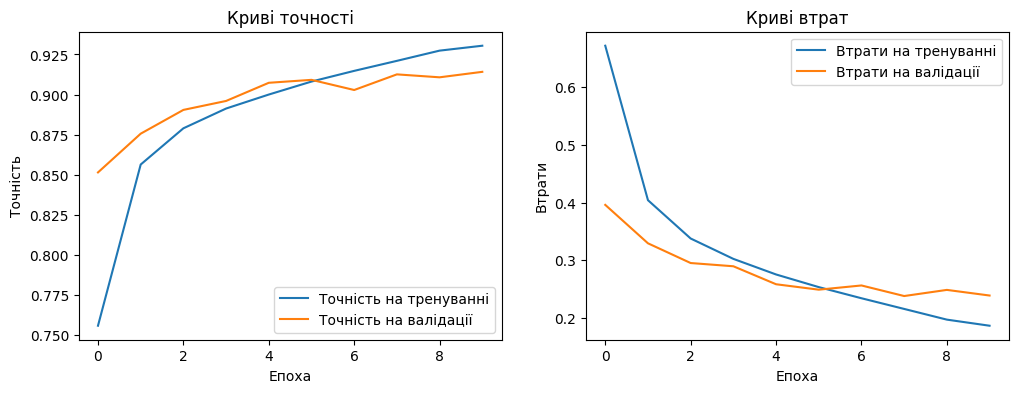

313/313 [==============================] - 1s 2ms/step


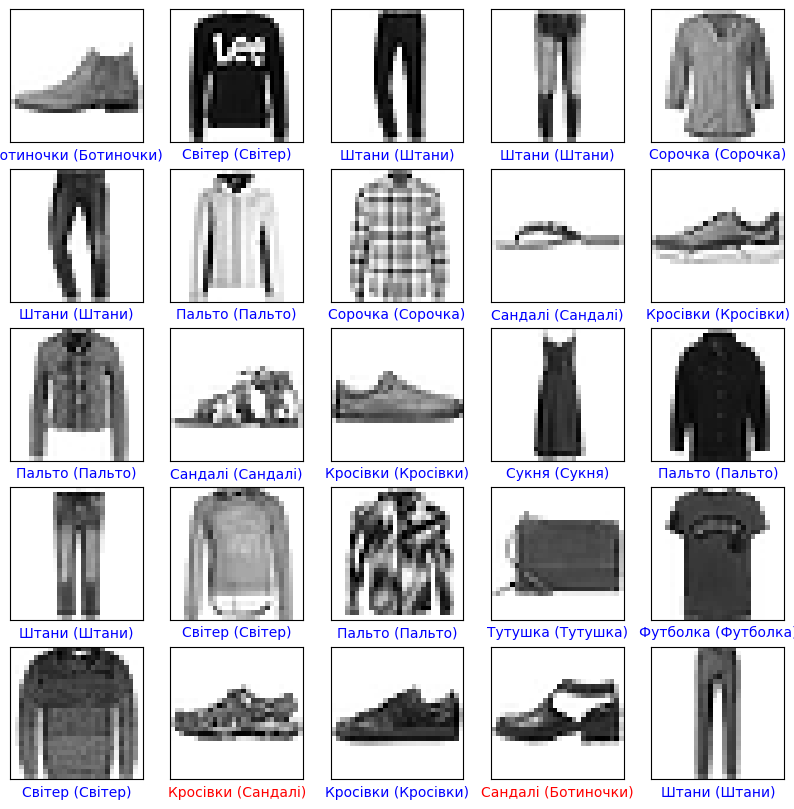

In [5]:
# Частина 1

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Перетворення міток у категоріальний формат
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()

# Додавання згорткових шарів
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

# Вирівнювання даних та додавання повнозв'язних шарів
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точність на тестових даних: {test_acc}')

# Візуалізація кривих навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.title('Криві точності')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.title('Криві втрат')

plt.show()

# Візуалізація результатів на тестових даних
predictions = model.predict(x_test)
class_names = ['Футболка', 'Штани', 'Світер', 'Сукня', 'Пальто', 'Сандалі', 'Сорочка', 'Кросівки', 'Тутушка', 'Ботиночки']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()

 Точність багатошарової мережі з попереднього завдання становила 0.8974000215530396, зараз 0.9115999937057495. Це означає, що згорткові нейронні мережі CNN краще підходять для цієї задачі класифікації зображень.

Epoch 1/20
938/938 [==============================] - 23s 22ms/step - loss: 0.5699 - accuracy: 0.8052 - val_loss: 0.3820 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 2/20
938/938 [==============================] - 21s 23ms/step - loss: 0.3648 - accuracy: 0.8788 - val_loss: 0.3317 - val_accuracy: 0.8862 - lr: 0.0010
Epoch 3/20
938/938 [==============================] - 20s 22ms/step - loss: 0.3292 - accuracy: 0.8896 - val_loss: 0.3401 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 4/20
938/938 [==============================] - 19s 20ms/step - loss: 0.3090 - accuracy: 0.8968 - val_loss: 0.3038 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 5/20
938/938 [==============================] - 20s 21ms/step - loss: 0.2934 - accuracy: 0.9018 - val_loss: 0.3250 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 6/20
938/938 [==============================] - 20s 21ms/step - loss: 0.2781 - accuracy: 0.9054 - val_loss: 0.3252 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 7/20
938/938 [==============================] - 19s 

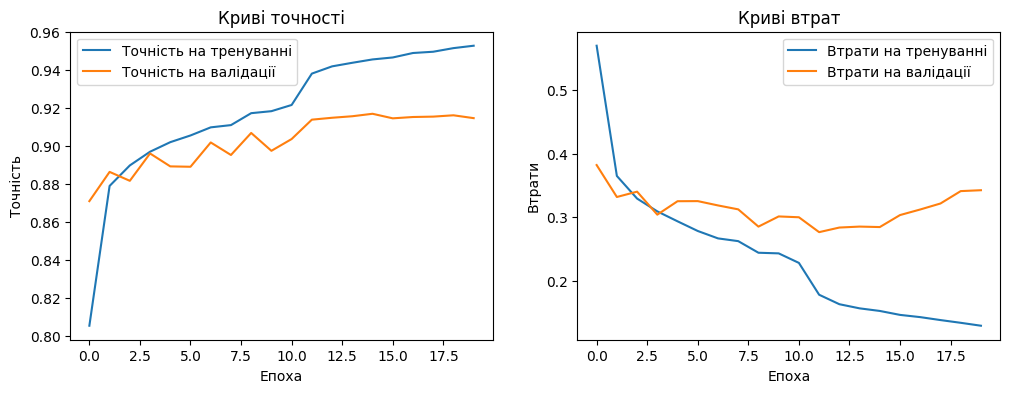

313/313 [==============================] - 2s 7ms/step


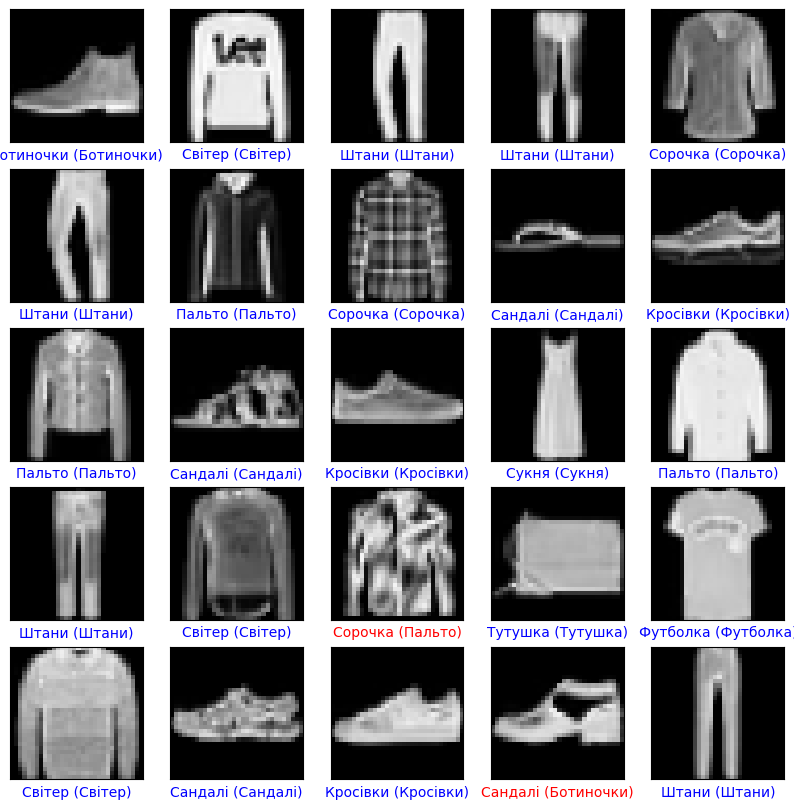

In [9]:
# Частина 2

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

# Функція для планувальника швидкості навчання
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    elif epoch > 15:
        lr *= 0.01
    return lr

# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація даних та зміна розмірності
x_train = tf.image.resize(tf.expand_dims(x_train, -1), [32, 32])
x_test = tf.image.resize(tf.expand_dims(x_test, -1), [32, 32])
x_train = tf.repeat(x_train, 3, axis=-1)
x_test = tf.repeat(x_test, 3, axis=-1)

# Нормалізація даних
x_train = x_train.numpy().astype('float32') / 255
x_test = x_test.numpy().astype('float32') / 255

# Перетворення міток у категоріальний формат
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Завантаження попередньо навченої моделі VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Додавання власних шарів
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Створення моделі
model = Model(inputs=base_model.input, outputs=predictions)

# Заморозка шарів VGG16
for layer in base_model.layers:
    layer.trainable = False

# Розморозка деяких верхніх шарів VGG16 для тонкого налаштування
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Компіляція моделі
model.compile(optimizer=Adam(learning_rate=lr_schedule(0)), loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[LearningRateScheduler(lr_schedule)])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точність на тестових даних: {test_acc}')

# Візуалізація кривих навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.title('Криві точності')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на тренуванні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.title('Криві втрат')

plt.show()

# Візуалізація результатів на тестових даних
predictions = model.predict(x_test)
class_names = ['Футболка', 'Штани', 'Світер', 'Сукня', 'Пальто', 'Сандалі', 'Сорочка', 'Кросівки', 'Тутушка', 'Ботиночки']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(32, 32, 3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()

Точність на тестових даних: 0.9144999980926514
Точність багатошарової мережі з попереднього завдання: 0.8974000215530396
Згорткова мережа з використанням VGG16 після тонкого налаштування показала кращу точність, ніж багатошарова мережа з попереднього завдання.